### 加载数据并处理为tensor形式

训练集大小: 60000
测试集大小: 10000
图像大小: torch.Size([1, 28, 28])


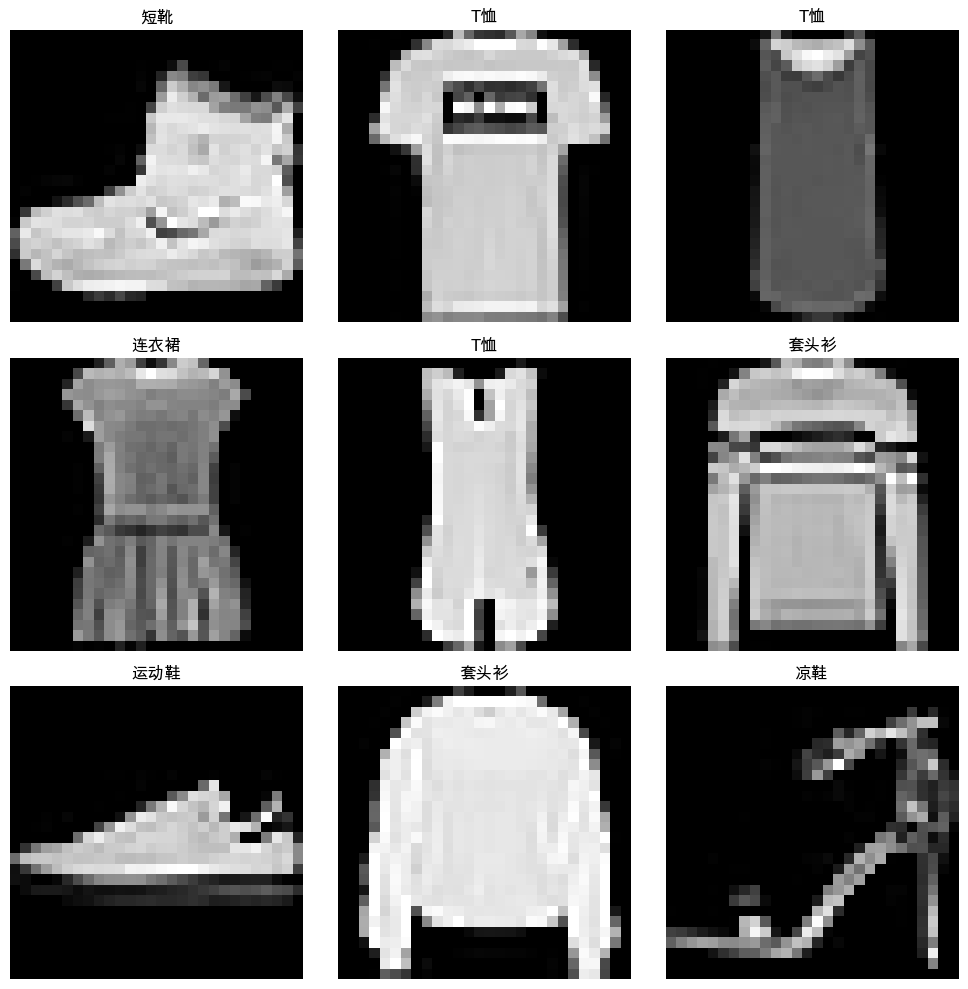


Fashion-MNIST数据集特点:
1. 包含10个类别的时尚物品灰度图像
2. 每张图像大小为28x28像素
3. 训练集60,000张图像，测试集10,000张图像
4. 像素值已归一化到0-1范围


In [45]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 定义数据转换
transform = transforms.Compose([ #transforms.Compose()函数将多个变换组合在一起，transforms.ToTensor()函数将图像转换为张量并归一化到[0,1]，注意其中做了归一化
    transforms.ToTensor(),  # 将图像转换为张量并归一化到[0,1]，注意其中做了归一化
    transforms.Normalize((0.286,), (0.353,)) 
])

# 加载Fashion-MNIST训练集和测试集
train_dataset = datasets.FashionMNIST('./data', train=True, download=True, transform=transform) #dataset是tensor的集合
test_dataset = datasets.FashionMNIST('./data', train=False, download=True, transform=transform)# train=True表示训练集，train=False表示测试集,download=True表示下载数据集，transform=transform表示数据预处理,数据预处理包括数据缩放、数据平移、数据旋转、数据剪裁、数据填充等

# 定义类别标签
class_names = ['T恤', '裤子', '套头衫', '连衣裙', '外套',
               '凉鞋', '衬衫', '运动鞋', '包', '短靴']

# 显示数据集的基本信息
print(f'训练集大小: {len(train_dataset)}')
print(f'测试集大小: {len(test_dataset)}')
print(f'图像大小: {train_dataset[0][0].shape}')
# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # macOS系统使用Arial Unicode MS字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 可视化几个样本
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_dataset[i][0].squeeze(), cmap='gray') # squeeze()函数将张量维度为1的维度去掉
    plt.title(class_names[train_dataset[i][1]])
    plt.axis('off') # 关闭坐标轴
plt.tight_layout() 
plt.show()

# 解释数据集特点
print('\nFashion-MNIST数据集特点:')
print('1. 包含10个类别的时尚物品灰度图像')
print('2. 每张图像大小为28x28像素')
print('3. 训练集60,000张图像，测试集10,000张图像')
print('4. 像素值已归一化到0-1范围')


In [46]:
# 计算训练集的均值和标准差

all_data = torch.stack([img_tensor for img_tensor , _ in train_dataset])
train_mean = torch.mean(all_data)
train_std = torch.std(all_data)

print("训练集均值:", train_mean)
print("训练集标准差:", train_std)


训练集均值: tensor(0.0001)
训练集标准差: tensor(1.0001)


### 划分数据集为训练集和测试集，并加载到DataLoader中，DataLoader会自动将数据进行批量处理，并打乱数据

In [47]:
from torch.utils.data import DataLoader
# 划分训练集和测试集
train_size = 55000
val_size = 5000

# 使用随机采样划分训练集
train_subset, val_subset = torch.utils.data.random_split(
    train_dataset,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(42)
)

# 创建DataLoader
batch_size = 64
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True) #shuffle=True表示训练时打乱数据
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
# 输出数据集大小信息
print(f'训练集大小: {len(train_subset)}')
print(f'验证集大小: {len(val_subset)}')
print(f'测试集大小: {len(test_loader)}')
print(f'训练批次数：{len(train_loader)}')


训练集大小: 55000
验证集大小: 5000
测试集大小: 157
训练批次数：860


In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        # 定义网络层
        self.layer1 = nn.Linear(28 * 28, 300)
        self.layer2 = nn.Linear(300, 100)
        self.layer3 = nn.Linear(100, 10)
        
    def forward(self, x):
        # 前向传播
        x = x.view(-1, 28 * 28) # 将输入的图片展平
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        return x


In [49]:
model = NeuralNetwork()
# 获取训练数据集中的第一个batch
images, labels = next(iter(train_loader))
print(labels)
print(images.shape)
# 对第一个batch进行前向计算
outputs = model(images)
#print(outputs)
# 打印输出shape和标签shape
print(f"输出张量形状: {outputs.shape}")
print(f"标签张量形状: {labels.shape}")


tensor([5, 3, 5, 2, 7, 1, 0, 8, 9, 4, 9, 3, 3, 8, 4, 5, 6, 0, 1, 9, 3, 3, 8, 9,
        5, 0, 5, 4, 5, 0, 2, 2, 0, 4, 0, 1, 0, 5, 8, 7, 8, 3, 1, 0, 5, 7, 0, 6,
        7, 6, 0, 2, 2, 6, 5, 0, 8, 1, 7, 2, 0, 9, 8, 1])
torch.Size([64, 1, 28, 28])
输出张量形状: torch.Size([64, 10])
标签张量形状: torch.Size([64])


In [50]:

# 从train_loader获取第一个批次的数据
dataiter = iter(train_loader)
images, labels = next(dataiter)

# # 选择第一张图像进行前向传播测试,unsqueeze(0)是添加批次维度
test_image = images[0].unsqueeze(0)  # 添加批次维度
print("测试图像形状:", test_image.shape)

print('-'*100)
# 进行前向传播
with torch.no_grad():  # 不需要计算梯度
    outputs = model(test_image)
    
# 获取预测结果
_, predicted = torch.max(outputs, 1)
print("模型预测结果:", predicted.item())
print("实际标签:", labels[0].item())




测试图像形状: torch.Size([1, 1, 28, 28])
----------------------------------------------------------------------------------------------------
模型预测结果: 5
实际标签: 0


In [51]:
# 计算模型总参数量
total_params = sum(p.numel() for p in model.parameters())
print(f'模型总参数量: {total_params:,}')

# 打印每层参数量明细
for name, param in model.named_parameters():
    print(f'{name}: {param.numel():,} 参数')


模型总参数量: 266,610
layer1.weight: 235,200 参数
layer1.bias: 300 参数
layer2.weight: 30,000 参数
layer2.bias: 100 参数
layer3.weight: 1,000 参数
layer3.bias: 10 参数


In [52]:
model.state_dict() # 获取模型参数

OrderedDict([('layer1.weight',
              tensor([[-0.0304, -0.0294,  0.0097,  ..., -0.0205, -0.0167,  0.0140],
                      [-0.0008, -0.0322,  0.0219,  ...,  0.0325, -0.0165,  0.0084],
                      [-0.0328, -0.0018,  0.0237,  ..., -0.0013, -0.0191,  0.0103],
                      ...,
                      [-0.0014, -0.0304,  0.0291,  ...,  0.0257,  0.0332,  0.0081],
                      [-0.0239, -0.0195, -0.0006,  ..., -0.0241,  0.0163, -0.0213],
                      [-0.0340, -0.0124,  0.0283,  ...,  0.0163, -0.0326,  0.0228]])),
             ('layer1.bias',
              tensor([-7.5266e-03, -3.6429e-03,  1.2141e-02,  3.2042e-02,  4.7225e-03,
                       8.6381e-03,  2.5441e-02, -2.3111e-02,  2.5587e-02,  2.4739e-03,
                      -3.3852e-02, -1.2930e-04, -1.3717e-02, -1.8847e-02, -6.0514e-03,
                      -1.4042e-02,  1.9188e-02, -6.4440e-03,  3.7551e-03, -5.3407e-03,
                      -7.7700e-03,  1.0379e-02,  3.0915e-0

### 设置交叉熵损失函数，和SGD优化器

In [53]:
# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()  # 交叉熵损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # SGD优化器，学习率为0.01，动量为0.9，model.parameters()为要优化的参数
print("损失函数:", criterion)
print("优化器:", optimizer)

损失函数: CrossEntropyLoss()
优化器: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


### 编写评估函数

In [54]:
def evaluate(model, data_loader, criterion, device):
    """评估模型在数据集上的表现"""
    model.eval()  # 设置为评估模式
    correct = 0 # 预测正确的样本数
    total = 0 # 总样本数
    total_loss = 0 # 损失值
    
    with torch.no_grad():  # 不计算梯度
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * images.size(0)
            
            _, predicted = torch.max(outputs.data, 1) # 获取最大概率的索引
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    #avg_loss = total_loss / len(data_loader)#len(data_loader)为50000/64，total为50000
    avg_loss = total_loss / total
    accuracy = 100 * correct / total
    return avg_loss, accuracy


### 编写训练函数

In [ ]:
def train(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=10):
    """训练模型num_epochs轮"""
    # best_acc = 0  # 记录最佳准确率
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}  # 存储训练历史
    
    for epoch in range(num_epochs):
        model.train()  # 设置为训练模式
        total_loss = 0 # 记录训练损失
        correct = 0 # 记录训练准确数
        total = 0 # 训练数据总数
        
        for batch_idx, (inputs, targets) in enumerate(train_loader):
            # 将数据移至指定设备
            inputs, targets = inputs.to(device), targets.to(device)
            
            # 梯度清零
            optimizer.zero_grad()
            
            # 前向传播
            outputs = model(inputs)
            
            # 计算损失
            loss = criterion(outputs, targets)
            
            # 反向传播
            loss.backward()
            
            # 更新参数
            optimizer.step()
            
            # 累计损失
            total_loss += loss.item()
            
            # 计算准确率
            _, predicted = outputs.max(1) # 获取预测结果
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item() 
            
            # 每100个batch打印一次训练信息
            if (batch_idx + 1) % 100 == 0:
                print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx + 1}, '
                      f'Loss: {loss.item():.4f}, Acc: {100. * correct / total:.2f}%')
        
        # 计算当前epoch的平均损失和准确率
        train_loss = total_loss / len(train_loader)
        train_acc = 100. * correct / total
        
        # 使用evaluate函数进行验证集评估
        val_loss, val_acc = evaluate(model, val_loader, criterion, device)
        
        # 将当前epoch的指标添加到历史记录中
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        print(f'\nEpoch: {epoch+1}/{num_epochs}')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%')
        print(f'Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%\n')
    
    return model, history


In [56]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model , history = train(model, train_loader,val_loader,criterion, optimizer, device,num_epochs=20)

Epoch: 1/20, Batch: 100, Loss: 0.9108, Acc: 61.95%
Epoch: 1/20, Batch: 200, Loss: 0.5036, Acc: 70.66%
Epoch: 1/20, Batch: 300, Loss: 0.4781, Acc: 74.40%
Epoch: 1/20, Batch: 400, Loss: 0.5855, Acc: 76.66%
Epoch: 1/20, Batch: 500, Loss: 0.6906, Acc: 78.02%
Epoch: 1/20, Batch: 600, Loss: 0.3617, Acc: 79.05%
Epoch: 1/20, Batch: 700, Loss: 0.6836, Acc: 79.87%
Epoch: 1/20, Batch: 800, Loss: 0.2631, Acc: 80.51%

Epoch: 1/20
Train Loss: 0.5353 | Train Acc: 80.86%
Val Loss: 0.4237 | Val Acc: 84.66%

Epoch: 2/20, Batch: 100, Loss: 0.4452, Acc: 86.22%
Epoch: 2/20, Batch: 200, Loss: 0.4047, Acc: 85.90%
Epoch: 2/20, Batch: 300, Loss: 0.2401, Acc: 86.17%
Epoch: 2/20, Batch: 400, Loss: 0.3577, Acc: 86.00%
Epoch: 2/20, Batch: 500, Loss: 0.2903, Acc: 86.10%
Epoch: 2/20, Batch: 600, Loss: 0.2504, Acc: 86.29%
Epoch: 2/20, Batch: 700, Loss: 0.2578, Acc: 86.39%
Epoch: 2/20, Batch: 800, Loss: 0.5078, Acc: 86.44%

Epoch: 2/20
Train Loss: 0.3677 | Train Acc: 86.50%
Val Loss: 0.3670 | Val Acc: 86.72%

Epoch: 3

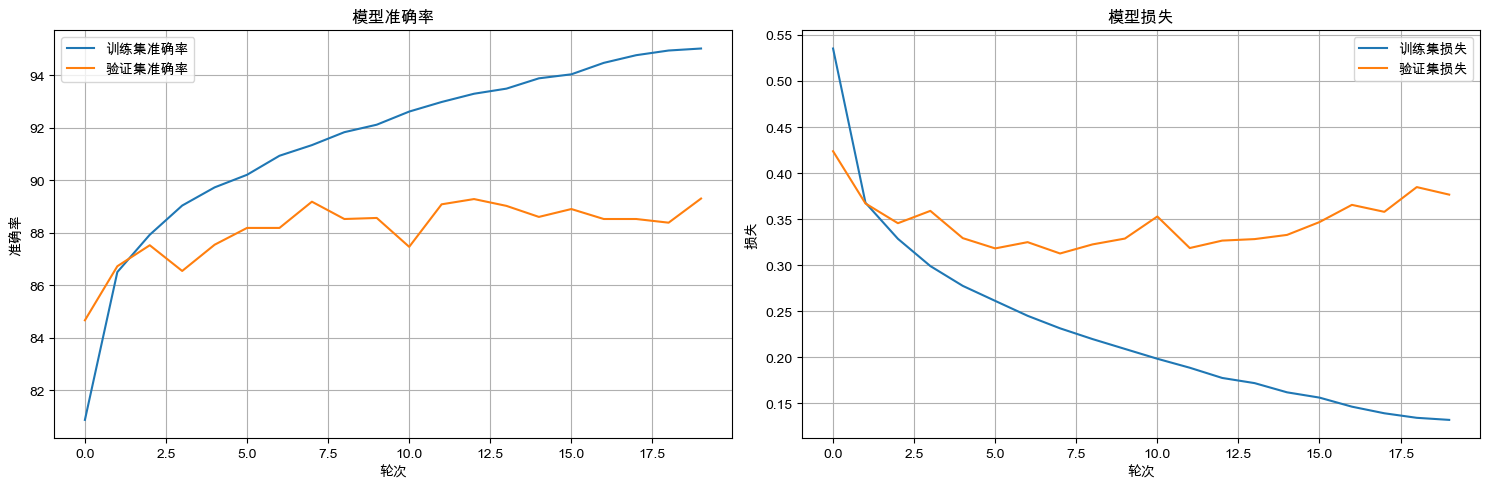

In [57]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # macOS系统使用
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 创建两个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 绘制准确率曲线
ax1.plot(history['train_acc'], label='训练集准确率')
ax1.plot(history['val_acc'], label='验证集准确率')
ax1.set_title('模型准确率')
ax1.set_xlabel('轮次')
ax1.set_ylabel('准确率')
ax1.legend()
ax1.grid(True)

# 绘制损失率曲线
ax2.plot(history['train_loss'], label='训练集损失')
ax2.plot(history['val_loss'], label='验证集损失')
ax2.set_title('模型损失')
ax2.set_xlabel('轮次')
ax2.set_ylabel('损失')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


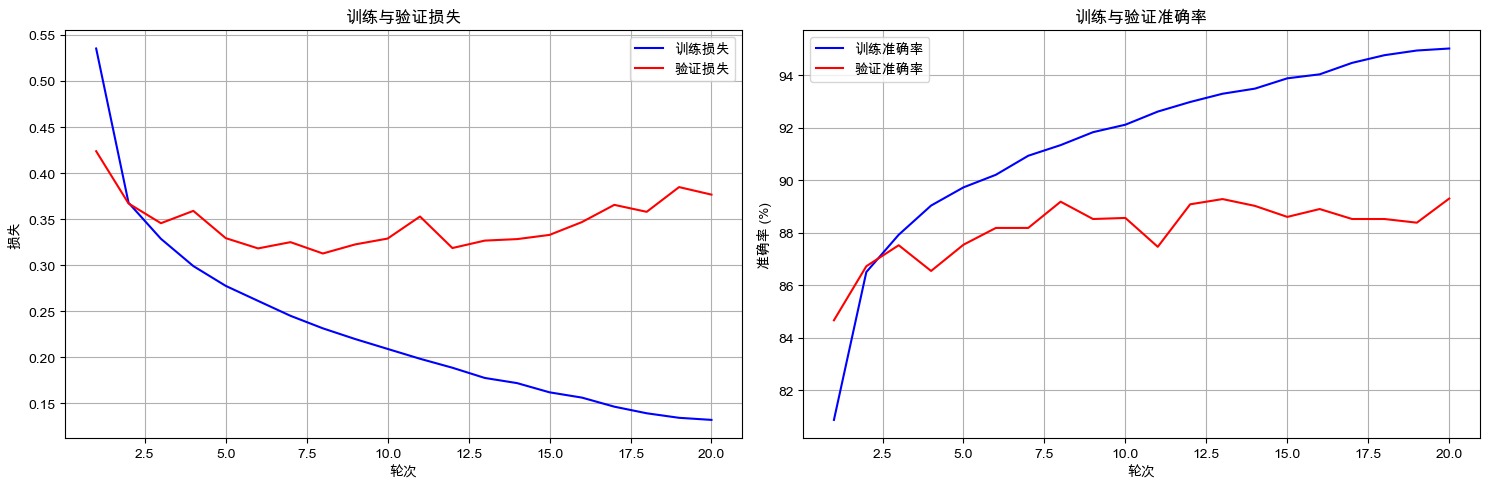

In [60]:
# 创建一个图形，包含两个子图（损失和准确率）
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 绘制损失曲线
epochs = range(1, len(history['train_loss']) + 1)
ax1.plot(epochs, history['train_loss'], 'b-', label='训练损失')
ax1.plot(epochs, history['val_loss'], 'r-', label='验证损失')
ax1.set_title('训练与验证损失')
ax1.set_xlabel('轮次')
ax1.set_ylabel('损失')
ax1.legend()
ax1.grid(True)

# 绘制准确率曲线
ax2.plot(epochs, history['train_acc'], 'b-', label='训练准确率')
ax2.plot(epochs, history['val_acc'], 'r-', label='验证准确率')
ax2.set_title('训练与验证准确率')
ax2.set_xlabel('轮次')
ax2.set_ylabel('准确率 (%)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [59]:
avgloss,test_acc = evaluate(model, test_loader,criterion,device)
test_acc


89.06